# Random Forest(Fraud_check)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\Excelr\assignments\Random forest\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


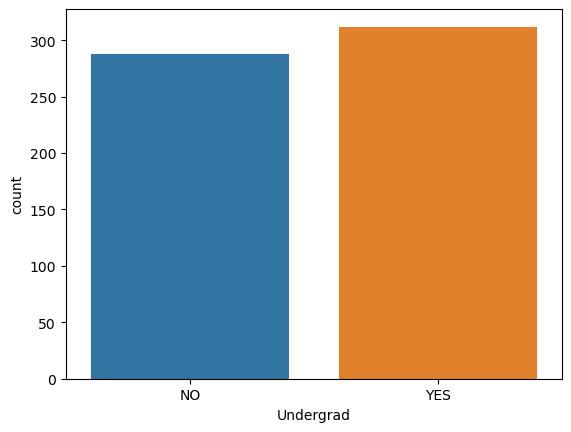

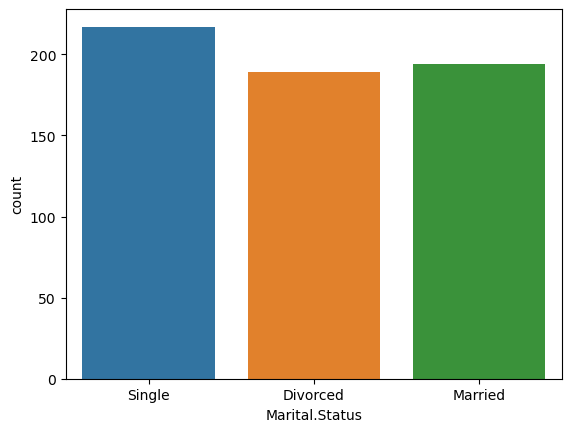

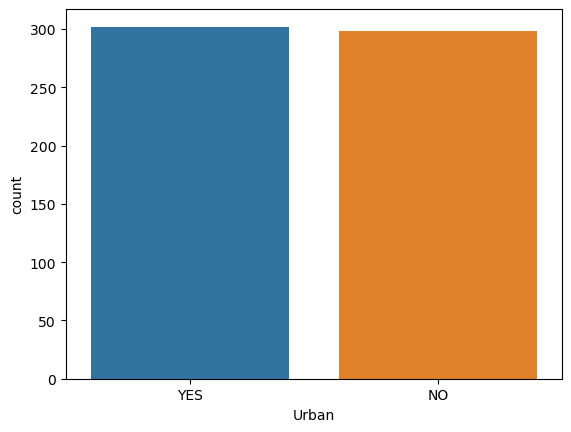

In [5]:
# checking count of categories for categorical columns
sns.countplot(data['Undergrad'])
plt.show()

sns.countplot(data['Marital.Status'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

In [6]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
data['Taxable.Income'] = pd.cut(x=data['Taxable.Income'],bins=[0,30000,100000], labels=['risky','good'], right = False)
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES
596,YES,Divorced,good,55369,2,YES
597,NO,Divorced,good,154058,0,YES
598,YES,Married,good,180083,17,NO


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

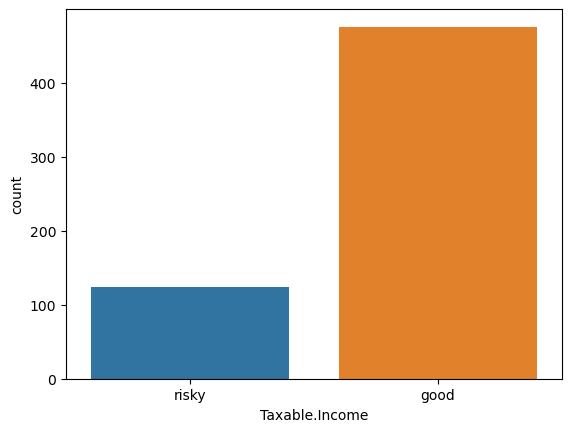

In [7]:
sns.countplot(data['Taxable.Income'])

In [8]:
data['Taxable.Income'].value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

In [9]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,good,50047,10,1
1,1,0,good,134075,18,1
2,0,1,good,160205,30,1
3,1,2,good,193264,15,1
4,0,1,good,27533,28,0
...,...,...,...,...,...,...
595,1,0,good,39492,7,1
596,1,0,good,55369,2,1
597,0,0,good,154058,0,1
598,1,1,good,180083,17,0


In [10]:
data.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000


In [11]:
# dropping column taxable_income
data1 = data.drop('Taxable.Income', axis = 1)
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [12]:
# Dividing data into independent variables and dependent variable
x = data1.iloc[:,0:]
y = data['Taxable.Income']

In [13]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=40)

In [16]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
454,0,1,29602,15,1
82,0,0,111068,26,1
146,0,0,57931,28,1
298,0,2,119904,21,1
331,1,1,60999,15,1
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [17]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
78,1,0,143153,0,0
380,1,1,197699,2,0
199,1,1,145744,9,1
101,1,1,50490,20,1


In [18]:
y_train

454     good
82      good
146     good
298     good
331    risky
       ...  
440     good
165     good
7       good
219    risky
326    risky
Name: Taxable.Income, Length: 402, dtype: category
Categories (2, object): ['risky' < 'good']

In [19]:
y_test

159     good
307     good
253     good
528     good
137    risky
       ...  
78      good
380     good
199    risky
101     good
438    risky
Name: Taxable.Income, Length: 198, dtype: category
Categories (2, object): ['risky' < 'good']

### Random Forest Classification

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'auto'
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [21]:
# Train the model on training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
kfold = KFold(n_splits=10)

results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7542682926829267


### Bagged Decision Trees for Classification

In [23]:
from sklearn.ensemble import BaggingClassifier

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7468292682926829


### AdaBoost Classification

In [24]:
from sklearn.ensemble import AdaBoostClassifier

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())


0.8012804878048781
